In [27]:
import numpy as np
import pandas as pd

import tensorflow as tf
import seaborn as sns

from sklearn.utils import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

#### url : https://www.kaggle.com/datasets/joebeachcapital/sepsis-survival-minimal-clinical-records

In [3]:
data = pd.read_csv('/kaggle/input/sepsis-survival-minimal-clinical-records/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_primary_cohort.csv')

In [4]:
data

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1
...,...,...,...,...
110199,0,0,1,1
110200,0,1,1,1
110201,70,1,1,1
110202,0,0,1,1


<Axes: >

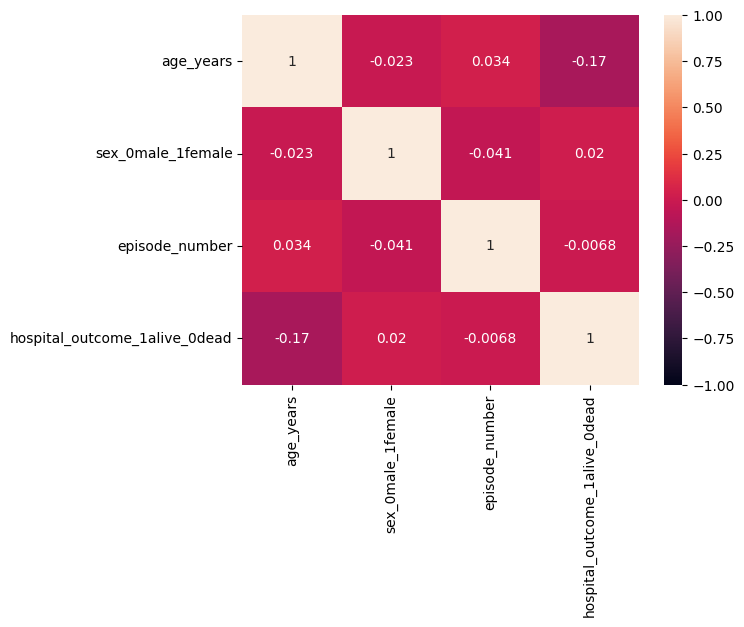

In [8]:
sns.heatmap(data.corr(),annot=True,vmin=-1.0,vmax=1.0)

In [11]:
y = data['hospital_outcome_1alive_0dead']
x = data.drop('hospital_outcome_1alive_0dead',axis=1)

/tmp/ipykernel_32/3413551308.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x,shade=True)


<Axes: ylabel='Density'>

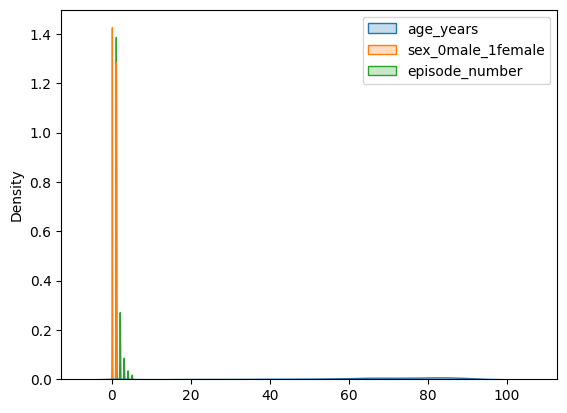

In [12]:
sns.kdeplot(x,shade=True)

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7,random_state=7)

In [26]:
log = LogisticRegression(C=0.01)
log.fit(x_train,y_train)
log.score(x_test,y_test)
    

0.9250499062367673

In [31]:
weights = dict(
    enumerate(
        compute_class_weight(
            'balanced',
            classes=y_train.unique(),
            y=y_train
        )
    )
)
weights

{0: 0.5393413969097393, 1: 6.854629465079083}

In [32]:
x.shape

(110204, 3)

In [41]:
inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(16,activation='relu')(inputs)
x = tf.keras.layers.Dense(16,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

hist = model.fit(
    x_train ,
    y_train,
    validation_split=0.2,
    class_weight=weights,
    batch_size=40,
    epochs=10
)


Epoch 1/10
1543/1543 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.9267 - val_loss: 0.4041 - val_accuracy: 0.9283
Epoch 2/10
1543/1543 [==============================] - 3s 2ms/step - loss: 0.2451 - accuracy: 0.9267 - val_loss: 0.3973 - val_accuracy: 0.9283
Epoch 3/10
1543/1543 [==============================] - 3s 2ms/step - loss: 0.2382 - accuracy: 0.9267 - val_loss: 0.3728 - val_accuracy: 0.9283
Epoch 4/10
1543/1543 [==============================] - 3s 2ms/step - loss: 0.2354 - accuracy: 0.9267 - val_loss: 0.3339 - val_accuracy: 0.9283
Epoch 5/10
1543/1543 [==============================] - 3s 2ms/step - loss: 0.2361 - accuracy: 0.9267 - val_loss: 0.3536 - val_accuracy: 0.9283
Epoch 6/10
1543/1543 [==============================] - 3s 2ms/step - loss: 0.2349 - accuracy: 0.9267 - val_loss: 0.3493 - val_accuracy: 0.9283
Epoch 7/10
1543/1543 [==============================] - 3s 2ms/step - loss: 0.2359 - accuracy: 0.9267 - val_loss: 0.3303 - val_accuracy: